In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv( 'data3/ch2_scores_em.csv', index_col='student number')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   english      50 non-null     int64
 1   mathematics  50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


In [6]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]
scores_df = pd.DataFrame({'english':en_scores, 'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E','F', 'G', 'H', 'I', 'J'],name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


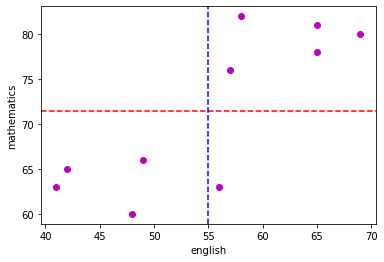

In [14]:
plt.scatter( scores_df['english'],scores_df['mathematics'], c='m')
plt.xlabel('english')
plt.ylabel('mathematics')
plt.axhline(scores_df['mathematics'].mean(), color='r', ls='--')
plt.axvline(scores_df['english'].mean(), color='b', ls='--')
plt.show()

### 공분산(Covariance)

두 데이터 사이의 관계를 나타내는 지표

- 양의 값 : 면적이 양의 값이 되는 데이터가 많다.( + 끼리 또는 - 끼리 곱한다.) => 양의 상관관계
- 음의 값 : 면적이 음의 값이 되는 데이터가 많다.( +,- 끼리 곱한다)              => 음의 상관관계
- 무상관  : 0에 근사.

In [16]:
summary_df                          = scores_df.copy()
summary_df['english_deviation']     = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [81]:
def covariance(x, y):
    ax, ay = x.mean(), y.mean()
    data   = [(ax-x)*(ay-y) for x, y in zip(x,y)]
    # print('data', data)
    return sum(data) / len(x)

In [44]:
np.cov( summary_df['english'], summary_df['mathematics'], ddof=0 )  # ddof=1 : 표폰분산, ddof=0 : 모분산 

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [35]:
covariance(summary_df['english'], summary_df['mathematics'])

62.8

#### 공분산 내에서의 분산

In [38]:
covariance(summary_df['english'], summary_df['english'])

86.0

In [45]:
summary_df['english'].var(ddof=0)  # summary_df['english'].values.var()

86.0

In [37]:
covariance(summary_df['mathematics'], summary_df['mathematics'])

68.44000000000001

In [50]:
summary_df['mathematics'].var(ddof=0)

68.44000000000001

### 상관계수

단위에 의존하지 않는 상관관계 지표(-1~1 사이의 값을 가진다.)

In [57]:
np.cov( summary_df['english'], summary_df['mathematics'], ddof=0 )[0,1]

62.800000000000004

In [63]:
np.cov( summary_df['english'], summary_df['mathematics'], ddof=0 )[0,1]/\
                                                ( np.std(summary_df['english'])*np.std(summary_df['mathematics']) )

0.8185692341186713

In [64]:
np.corrcoef(summary_df['english'], summary_df['mathematics'])

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [80]:
scores_df.corr()['english'][1]

0.8185692341186713

In [77]:
summary_df.corr()

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
english,1.000000,0.818569,1.000000,0.818569,-0.017808
mathematics,0.818569,1.000000,0.818569,1.000000,0.067759
english_deviation,1.000000,0.818569,1.000000,0.818569,-0.017808
mathematics_deviation,0.818569,1.000000,0.818569,1.000000,0.067759
product of deviations,-0.017808,0.067759,-0.017808,0.067759,1.000000
